# Predicting Airbnb Prices Using Logistic Regression

## Name: <span style="color:blue"> *Santiago Primera Escobedo* </span>

## Utils

In [3]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression

## Data Loading

In [6]:
airbnb_df = pd.read_csv("AB_NYC_2019.csv")

In [7]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [9]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Visualization

<Axes: xlabel='number_of_reviews', ylabel='price'>

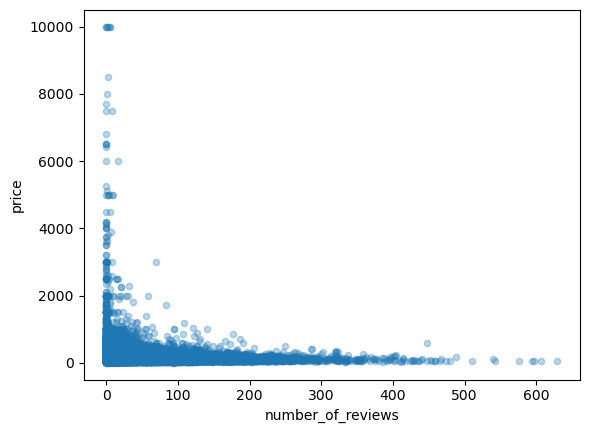

In [15]:
airbnb_df.plot.scatter(x="number_of_reviews", y="price", alpha=0.3)

There isn't a clear linear relationship between price and # of reviews, but cheaper listings tend to accumulate more reviews.

<Axes: xlabel='neighbourhood_group', ylabel='price'>

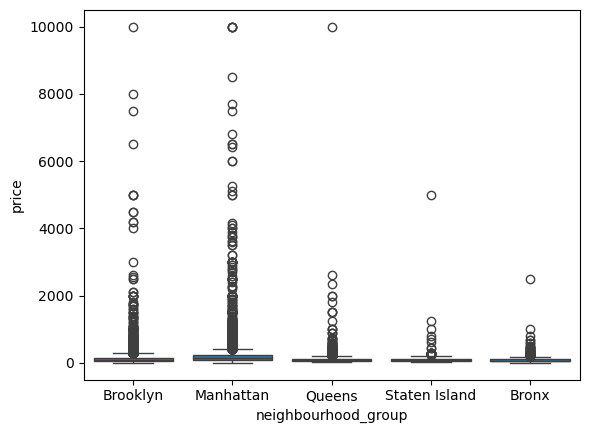

In [25]:
sns.boxplot(data=airbnb_df, x="neighbourhood_group", y="price")

Manhattan is the most expensive borough, followed by Brooklyn.

<Axes: >

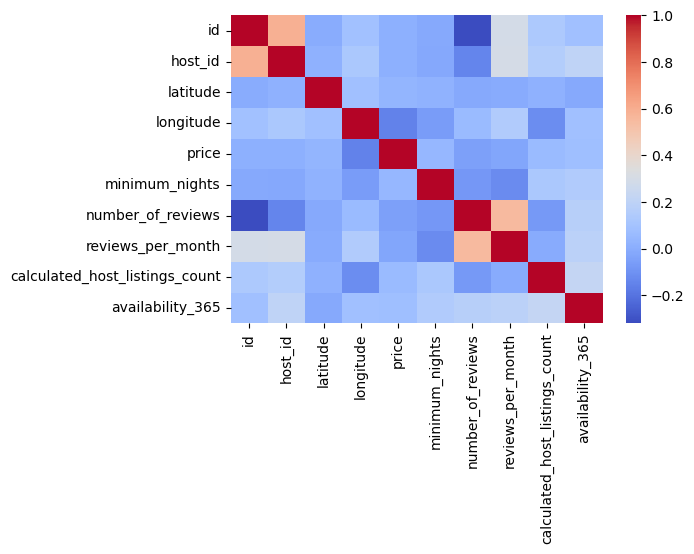

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(airbnb_df.corr(numeric_only=True), annot=False, cmap="coolwarm")

Correlation between numeric predictors is low overall, suggesting weak linear relationship between features.

## Pre-Processing

In [32]:
airbnb_df = airbnb_df[[
    "price",
    "minimum_nights",
    "number_of_reviews",
    "reviews_per_month",
    "availability_365",
    "room_type",
    "neighbourhood_group",
    "latitude",
    "longitude"
]]

airbnb_df = airbnb_df.dropna()

airbnb_df = airbnb_df[airbnb_df["price"] <= 1000]

In [29]:
airbnb_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,room_type,neighbourhood_group,latitude,longitude
0,149,1,9,0.21,365,Private room,Brooklyn,40.64749,-73.97237
1,225,1,45,0.38,355,Entire home/apt,Manhattan,40.75362,-73.98377
3,89,1,270,4.64,194,Entire home/apt,Brooklyn,40.68514,-73.95976
4,80,10,9,0.10,0,Entire home/apt,Manhattan,40.79851,-73.94399
5,200,3,74,0.59,129,Entire home/apt,Manhattan,40.74767,-73.97500


Dropping non-numerical features (such as host name) and null values. I'm also dropping any rows with price over 1000 since those are usually outliers/luxury rentals and may not represent the larger population.

In [35]:
from sklearn.preprocessing import LabelEncoder

le_room = LabelEncoder()
le_ng = LabelEncoder()

airbnb_df["room_type"] = le_room.fit_transform(airbnb_df["room_type"])
airbnb_df["neighbourhood_group"] = le_ng.fit_transform(airbnb_df["neighbourhood_group"])

In [37]:
airbnb_df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,availability_365,room_type,neighbourhood_group,latitude,longitude
0,149,1,9,0.21,365,1,1,40.64749,-73.97237
1,225,1,45,0.38,355,0,2,40.75362,-73.98377
3,89,1,270,4.64,194,0,1,40.68514,-73.95976
4,80,10,9,0.10,0,0,2,40.79851,-73.94399
5,200,3,74,0.59,129,0,2,40.74767,-73.97500


Enconding remaining non-numerical features that are relevant to price.

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np

def get_preprocessed_data(X: np.ndarray, y: np.ndarray):
    """
    Splits data into train, validation, and test sets using the
    same two-step approach shown in the class assignments.
    """
    
    # First: train (80%) + test (20%)
    X_trn, X_tst, y_trn, y_tst = train_test_split(
        X, y, train_size=0.8, random_state=42
    )
    
    # Second: split train into train (80%) + validation (20%)
    X_trn, X_vld, y_trn, y_vld = train_test_split(
        X_trn, y_trn, train_size=0.8, random_state=42
    )
    
    return X_trn, y_trn, X_vld, y_vld, X_tst, y_tst

Splitting the data into training, validation, and test sets.

In [48]:
from sklearn.preprocessing import StandardScaler

y = airbnb_df["price"].to_numpy()
X = airbnb_df.drop("price",axis=1).to_numpy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

bias = np.ones((X_scaled.shape[0], 1))
X = np.hstack([bias, X_scaled])

Setting our target and features, as well as scaling and adding a bias term.

## Models

### Ridge Regression OLS

In [41]:
class RidgeRegression:
    def __init__(self, lamb=0.1):
        self.lamb = lamb
        self.w = None
        
    def fit(self, X, y):
        M = X.shape[1]
        I = np.eye(M)
        I[0,0] = 0

        self.w = np.linalg.inv(X.T @ X + self.lamb * I) @ X.T @ y
        return self

    def predict(self,X):
        yhat = X @ self.w
        if yhat.ndim == 1:
            yhat = yhat.reshape(-1,1)
        return yhat

I recreated a RidgeRegression class that converts the ridge regression OLS equation into code to compute the optimal weights $\wv$. It also has a predict function to get the linear combinations between the weights and the passed data.

In [51]:
X_trn, y_trn, X_vld, y_vld, X_tst, y_tst = get_preprocessed_data(X, y)

ridge = RidgeRegression(lamb=0.1)
ridge.fit(X_trn, y_trn)

y_vld_pred = ridge.predict(X_vld)
y_tst_pred_ridge = ridge.predict(X_tst)

### Random Forest Regression

In [53]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 200, random_state = 42, n_jobs = 1)

rf_reg.fit(X_trn, y_trn)

y_vld_pred_rf = rf_reg.predict(X_vld)
y_tst_pred_rf = rf_reg.predict(X_tst)

Trained a Random Forest Regression model imported from sklearn.

## Results

In [55]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score

def print_regression_metrics(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true,y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{name}")
    print(f"  MAE : {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R^2 : {r2:.3f}")
    print()

print_regression_metrics("Ridge Regression (test)", y_tst, y_tst_pred_ridge)
print_regression_metrics("Random Forest (test)", y_tst, y_tst_pred_rf)

Ridge Regression (test)
  MAE : 52.30
  RMSE: 84.96
  R^2 : 0.317

Random Forest (test)
  MAE : 46.06
  RMSE: 76.77
  R^2 : 0.442

